# Hypothesis Testing

## 2 Ounce P-Value

In [1]:
import survey
table = survey.Pregnancies()
table.ReadRecords()

In [3]:
import Cdf
import myplot
%matplotlib inline

In [4]:
def is_live_birth(record):
    return record.outcome == 1

live_births = [r for r in table.records if is_live_birth(r)]
first_weights = []
other_weights = []

for rec in live_births:
    weight = rec.totalwgt_oz
    if weight == "NA":
        continue
    if rec.birthord == 1:
        first_weights.append(weight)
    else:
        other_weights.append(weight)

In [5]:
import numpy as np

def differences(xs, ys, samples=10000):
    """
    returns a list of the difference in the means in
    x and y using a permutation test
    """
    xarr = np.array(xs)
    yarr = np.array(ys)
    arr = np.concatenate([xarr, yarr])
    split_at = len(xarr)
    
    acc = []
    for _ in xrange(samples):
        (subxs, subys) = np.split(np.random.permutation(arr), [split_at])
        acc.append(abs(subxs.mean() - subys.mean()))
    return acc

In [6]:
cdf = Cdf.MakeCdfFromList(differences(first_weights, other_weights))

{'xscale': 'linear', 'yscale': 'linear'}

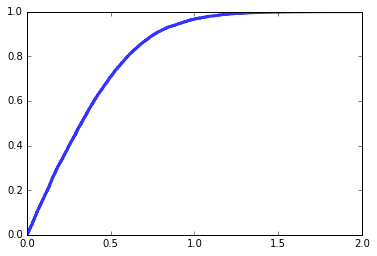

In [7]:
myplot.cdf(cdf)

In [8]:
cdf.Prob(2)

1.0